<a href="https://colab.research.google.com/github/helloarun0110/Deep-Learning/blob/main/CNN/pretrained_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **using pretrained model**

In [60]:
from google.colab import drive
drive.mount('/content/drive')
from PIL import Image
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
InputImg = Image.open("/content/drive/My Drive/dl/CNN/pizza.jfif")

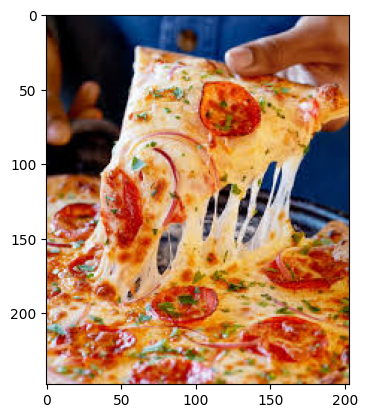

In [62]:
plt.imshow(InputImg)

In [63]:
from torchvision import transforms
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

InputImg_t = transform(InputImg)
print(InputImg_t.shape)

torch.Size([3, 224, 224])


In [64]:
import torch
batch_t = torch.unsqueeze(InputImg_t, 0)
print(batch_t.shape)

torch.Size([1, 3, 224, 224])


In [65]:
from torchvision import models
model = models.resnet50(pretrained=True)
model.eval()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

**single lables classification**

In [66]:
outpute = model(batch_t)
print(outpute.shape)

torch.Size([1, 1000])


In [67]:
with open('/content/drive/My Drive/dl/CNN/imagenet1000Classes.txt') as classesfile:
  imagenet_classes = [line.strip() for line in classesfile.readlines()]

_, predicted = torch.max(outpute, 1)
percentage = torch.softmax(outpute, dim=1)[0]*100
print(imagenet_classes[predicted[0]], percentage[predicted[0]])

963: 'pizza, pizza pie', tensor(91.2762, grad_fn=<SelectBackward0>)


## **multilables classification**

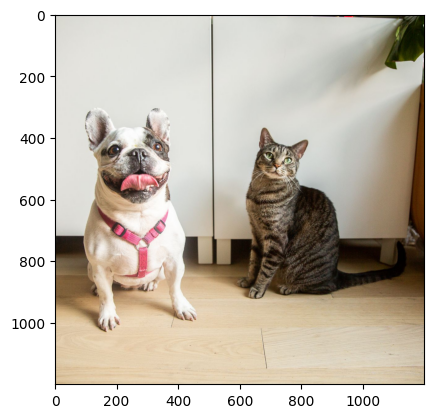

In [68]:
input_img2 = Image.open("/content/drive/My Drive/dl/CNN/Dog and Cat.jpg")
plt.imshow(input_img2)

In [69]:
outpute2 = model(transform(input_img2).unsqueeze(0))
print(outpute2.shape)

torch.Size([1, 1000])


In [70]:
_, predicted2 = torch.sort(outpute2, descending=True)
percentage2 = torch.sigmoid(outpute2)[0]*100
top_3_predictions = [(imagenet_classes[index], percentage2[index].item())
                      for index in predicted2[0][:5]
]
for label, confidence in top_3_predictions:
  print(f"class: {label} confidence: {confidence: .2f}%")

class: 281: 'tabby, tabby cat', confidence:  100.00%
class: 285: 'Egyptian cat', confidence:  99.99%
class: 282: 'tiger cat', confidence:  99.98%
class: 245: 'French bulldog', confidence:  99.97%
class: 195: 'Boston bull, Boston terrier', confidence:  99.95%
